# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

Develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sns.set_theme()

In [4]:
df_customer = pd.read_csv("dataset/Bank_Customer_retirement.csv")

In [5]:
df_customer.head()

Customer ID        Age  401K Savings  Retire
0            0  39.180417   322349.8740       0
1            1  56.101686   768671.5740       1
2            2  57.023043   821505.4718       1
3            3  43.711358   494187.4850       0
4            4  54.728823   691435.7723       1

In [6]:
df_customer.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [7]:
df_customer.head()

Customer ID        Age  401K Savings  Retire
0            0  39.180417   322349.8740       0
1            1  56.101686   768671.5740       1
2            2  57.023043   821505.4718       1
3            3  43.711358   494187.4850       0
4            4  54.728823   691435.7723       1

In [8]:
df_customer.tail()

Customer ID        Age  401K Savings  Retire
495          495  46.678128   704243.0776       1
496          496  43.545007   483175.9998       0
497          497  46.476724   354919.1987       0
498          498  50.903631   639789.9219       1
499          499  38.590586   491310.0096       0

In [12]:
skim(df_customer)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500    │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Customer ID     │   0 │     0 │    249.5 │   144.5 │   0 │   124.8 │   249.5 │   374.2 │      499 │ ▇▇▇▇▇▇ │  │
│ │ Age             │   0 │     0 │    46.76 │    7.79 │  25 │    41.3 │    46.7 │   52.32 │       70 │ ▁▅▇▇▃▁ │  │
│ │ 401K Savings    │   0 │     0 │   535000 │  187700 │  10 │  382600 │  534500 │  680700 │  1000000 │  ▅▇▇▇▁ │  │
│ │ Retire          │   0 │     0 │      0.5 │  0.5005 │   0 │       0 │     0.5 │       1 │        1 │ ▇    ▇ │  │
│ └─────────────────┴─────┴───────┴──────────┴─────────┴─────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [13]:
dfSummary(df_customer)

In [38]:
df_customer.drop(labels={'Customer ID'}, axis = 1, inplace= True)

# STEP #3: VISUALIZING THE DATA

<Axes: xlabel='Retire', ylabel='count'>

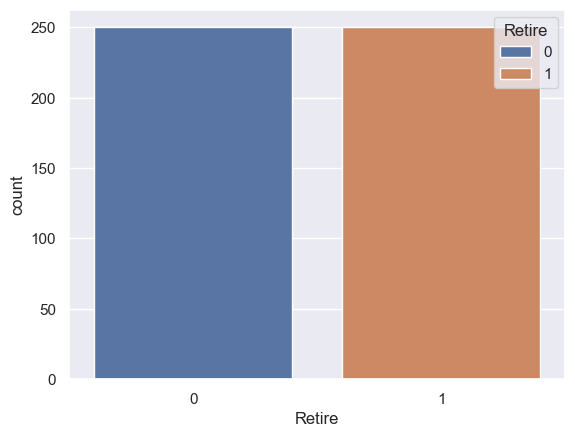

In [39]:
# Balanced target variable

sns.countplot(data = df_customer, x='Retire', hue='Retire')

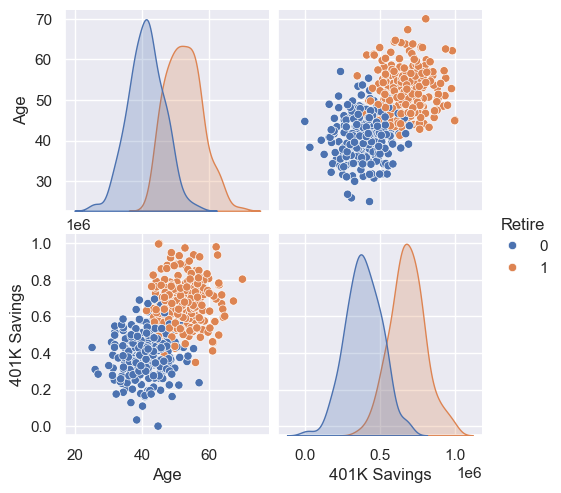

In [40]:
sns.pairplot(data = df_customer, vars=['Age', '401K Savings'], hue = 'Retire')

<Axes: ylabel='count'>

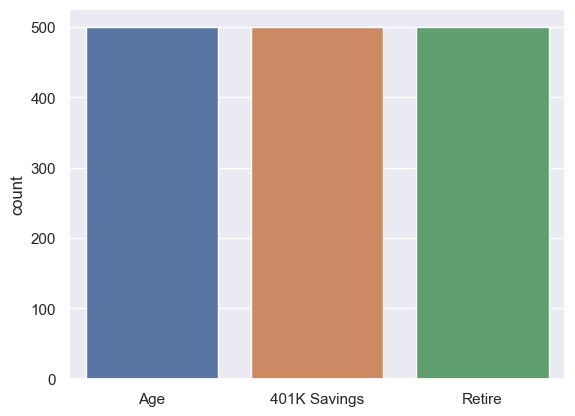

In [41]:
# We have no missing data

sns.countplot(df_customer.isna())

[Text(0.5, 1.0, 'Correlation')]

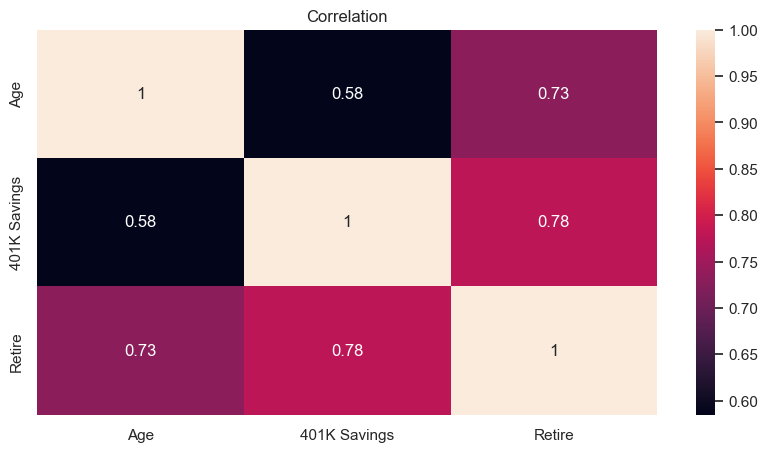

In [42]:
fig, ax = plt.subplots(figsize =(10, 5))
sns.heatmap(data = df_customer.corr(),
            annot=True)
ax.set(title = 'Correlation')

# Observations:
* The higher the more likely the person will retire and age and retire has a 0.73 correlation which makes sense
* Age and 401K savings are not that strong in their correlation
* 401K SAvings and Retire have a strong correlation showing that people who retire do have a 401K Savings account.

# STEP #4: MODEL TRAINING 

In [27]:
# Initilizing X and y

X = df_customer.drop(labels={'Retire', 'Customer ID'}, axis = 1)
y = df_customer['Retire']


In [28]:
X.head()

Age  401K Savings
0  39.180417   322349.8740
1  56.101686   768671.5740
2  57.023043   821505.4718
3  43.711358   494187.4850
4  54.728823   691435.7723

In [29]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Retire, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
svc_model = SVC()

In [44]:
svc_model.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

In [47]:
# Making the prediction using the test data with our SVM model

initial_predicted_y = svc_model.predict(X_test)

In [ ]:
# Classification report to see how well our model is doing

print(classification_report(y_pred=initial_predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.96      0.82      0.88        56

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



In [50]:
# Confusion matrix

cm_initial = confusion_matrix(y_pred=initial_predicted_y, y_true=y_test)

[Text(0.5, 1.0, 'Confusion Matrix visualised')]

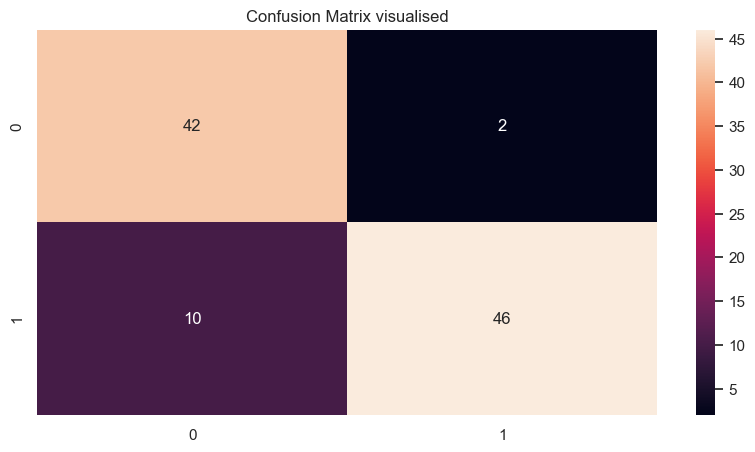

In [52]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(data = cm_initial, annot= True)
ax.set(title="Confusion Matrix visualised")

# STEP #6: IMPROVING THE MODEL.
## What can we do to further improve the model than it already is?

In [56]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose = 4)

In [57]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=4))
])

pipeline.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'gamma': [1, 0.1, 0.01, 0.001],
                                          'kernel': ['rbf']},
                              verbose=4))])

In [58]:
pipeline_predicted_y = pipeline.predict(X_test)

In [59]:
print(classification_report(y_pred=pipeline_predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<Axes: >

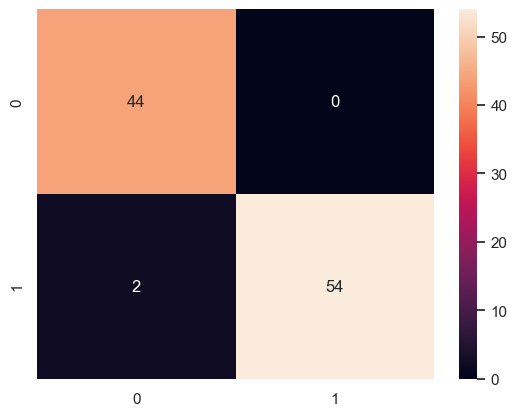

In [61]:
pipeline_cm = confusion_matrix(y_pred=pipeline_predicted_y, y_true=y_test)
sns.heatmap(data = pipeline_cm, annot=True)